In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import json
import numpy as np
import requests

In [3]:
#Import the main CSV file and trim columns to use
onlineMarketing = "T_ONTIME_MARKETING.csv"

airlinedata= pd.read_csv(onlineMarketing, encoding="utf-8", dtype=object)
cleanAirlineData = airlinedata[["ORIGIN_CITY_NAME", "ORIGIN_STATE_ABR", "DEST_CITY_NAME",
                                    "DEST_STATE_ABR", "CRS_DEP_TIME", "DEP_TIME", "DEP_DELAY",
                                      "TAXI_OUT", "TAXI_IN", "ARR_TIME", "ARR_DELAY", "CANCELLED", "CANCELLATION_CODE", "DIVERTED",
                                        "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY",
                                          "DIV_AIRPORT_LANDINGS", "DIV_ACTUAL_ELAPSED_TIME"]].fillna(0.0)

cleanAirlineData

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
0,"New York, NY",NY,"Los Angeles, CA",CA,0900,0852,-8.00,18.00,5.00,1124,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
1,"Los Angeles, CA",CA,"New York, NY",NY,1235,1232,-3.00,17.00,12.00,2107,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
2,"Boston, MA",MA,"Los Angeles, CA",CA,1800,1754,-6.00,18.00,8.00,2041,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
3,"Los Angeles, CA",CA,"Boston, MA",MA,0750,0742,-8.00,20.00,15.00,1638,...,0.00,0.0,0.00,0.00,0.00,19.00,0.00,0.00,0,0.0
4,"Phoenix, AZ",AZ,"Portland, OR",OR,1502,1458,-4.00,22.00,5.00,1654,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582420,"Phoenix, AZ",AZ,"Los Angeles, CA",CA,1200,1203,3.00,12.00,5.00,1218,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
582421,"Seattle, WA",WA,"Denver, CO",CO,1800,1842,42.00,15.00,5.00,2218,...,0.00,0.0,0.00,0.00,0.00,6.00,0.00,42.00,0,0.0
582422,"Orlando, FL",FL,"Austin, TX",TX,0705,0703,-2.00,18.00,4.00,0907,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
582423,"Los Angeles, CA",CA,"Sacramento, CA",CA,1315,1430,75.00,15.00,3.00,1549,...,0.00,0.0,0.00,69.00,0.00,0.00,0.00,0.00,0,0.0


In [4]:
# Filter to the city flight data we want to look at (Atlanta)
atlantaAirlines= cleanAirlineData.loc[(cleanAirlineData["ORIGIN_CITY_NAME"] == "Atlanta, GA") |
                                    (cleanAirlineData["DEST_CITY_NAME"] == "Atlanta, GA")]
atlantaAirlines

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_TIME,...,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
65,"Charlotte, NC",NC,"Atlanta, GA",GA,2035,2137,62.00,14.00,7.00,2237,...,0.00,0.0,0.00,5.00,0.00,0.00,0.00,41.00,0,0.0
114,"Phoenix, AZ",AZ,"Atlanta, GA",GA,1712,1710,-2.00,12.00,8.00,2235,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
148,"Dallas/Fort Worth, TX",TX,"Atlanta, GA",GA,1225,1215,-10.00,15.00,6.00,1505,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
149,"Atlanta, GA",GA,"Dallas/Fort Worth, TX",TX,1624,1743,79.00,15.00,4.00,1852,...,0.00,0.0,0.00,53.00,0.00,0.00,0.00,0.00,0,0.0
197,"Atlanta, GA",GA,"Dallas/Fort Worth, TX",TX,0547,0537,-10.00,26.00,19.00,0734,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582328,"New Orleans, LA",LA,"Atlanta, GA",GA,0650,0647,-3.00,10.00,7.00,0907,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
582333,"Atlanta, GA",GA,"Orlando, FL",FL,1045,1040,-5.00,10.00,5.00,1155,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
582334,"Memphis, TN",TN,"Atlanta, GA",GA,0740,0732,-8.00,11.00,6.00,0941,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0
582416,"Atlanta, GA",GA,"Jackson/Vicksburg, MS",MS,0850,0844,-6.00,20.00,5.00,0903,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0


In [29]:
# Collect flights that have either an arrival or departure delay
delayedflights = atlantaAirlines.loc[(atlantaAirlines["DEP_DELAY"].astype(float) > 0.0) | (atlantaAirlines["ARR_DELAY"].astype(float) > 0.0)]
delayedflights = delayedflights[["ORIGIN_CITY_NAME", "ORIGIN_STATE_ABR", "DEST_CITY_NAME",
                                    "DEST_STATE_ABR", "DEP_DELAY","TAXI_OUT", "TAXI_IN", "ARR_DELAY",
                                 "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY", "CANCELLED", "CANCELLATION_CODE", "DIVERTED",
                                          "DIV_AIRPORT_LANDINGS", "DIV_ACTUAL_ELAPSED_TIME"]].fillna(0.0)
delayedflights

,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
65,"Charlotte, NC",NC,"Atlanta, GA",GA,62.00,14.00,7.00,46.00,5.00,0.00,0.00,0.00,41.00,0.00,0.0,0.00,0,0.0
149,"Atlanta, GA",GA,"Dallas/Fort Worth, TX",TX,79.00,15.00,4.00,53.00,53.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0,0.0
197,"Atlanta, GA",GA,"Dallas/Fort Worth, TX",TX,-10.00,26.00,19.00,14.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0,0.0
268,"Dallas/Fort Worth, TX",TX,"Atlanta, GA",GA,35.00,15.00,9.00,29.00,29.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0,0.0
520,"Miami, FL",FL,"Atlanta, GA",GA,100.00,16.00,6.00,93.00,6.00,0.00,0.00,0.00,87.00,0.00,0.0,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581820,"Atlanta, GA",GA,"New York, NY",NY,5.00,12.00,10.00,10.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0,0.0
581834,"Houston, TX",TX,"Atlanta, GA",GA,37.00,13.00,4.00,26.00,25.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0,0.0
582154,"Atlanta, GA",GA,"Richmond, VA",VA,-1.00,16.00,3.00,2.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0,0.0
582251,"Atlanta, GA",GA,"Miami, FL",FL,2.00,10.00,6.00,-19.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0,0.0


In [30]:
# Collect flight info for delay types/reason
# Create a new DataFrame with only the delay columns
delay_columns = ["CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY", "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]
delay_data = delayedflights[delay_columns]

# Convert delay column values to numeric
delay_data = delay_data.apply(pd.to_numeric, errors='coerce')

# Filter rows where all delay columns are 0.0
all_zero_rows = delay_data[delay_data.eq(0.0).all(axis=1)]

# Print the number of rows with all delay columns as 0.0
num_all_zero_rows = all_zero_rows.shape[0]
print(f"Number of rows with all delay columns as 0.0: {num_all_zero_rows}")

# Obtain counts for delay types based on delay type columns with a value greater than 0.0 for each row
delay_counts = {"CARRIER_DELAY": 0, "WEATHER_DELAY": 0, "NAS_DELAY": 0, "SECURITY_DELAY": 0, "LATE_AIRCRAFT_DELAY": 0}

for index, row in delay_data.iterrows():
    for col in delay_columns:
        if row[col] > 0.0:
            delay_counts[col] += 1

print("Counts for delay types based on delay type columns with a value greater than 0.0 for each row:")
for key, value in delay_counts.items():
    print(f"{key}: {value}")

Number of rows with all delay columns as 0.0: 13263
Counts for delay types based on delay type columns with a value greater than 0.0 for each row:
CARRIER_DELAY: 5921
WEATHER_DELAY: 970
NAS_DELAY: 5779
SECURITY_DELAY: 35
LATE_AIRCRAFT_DELAY: 4591


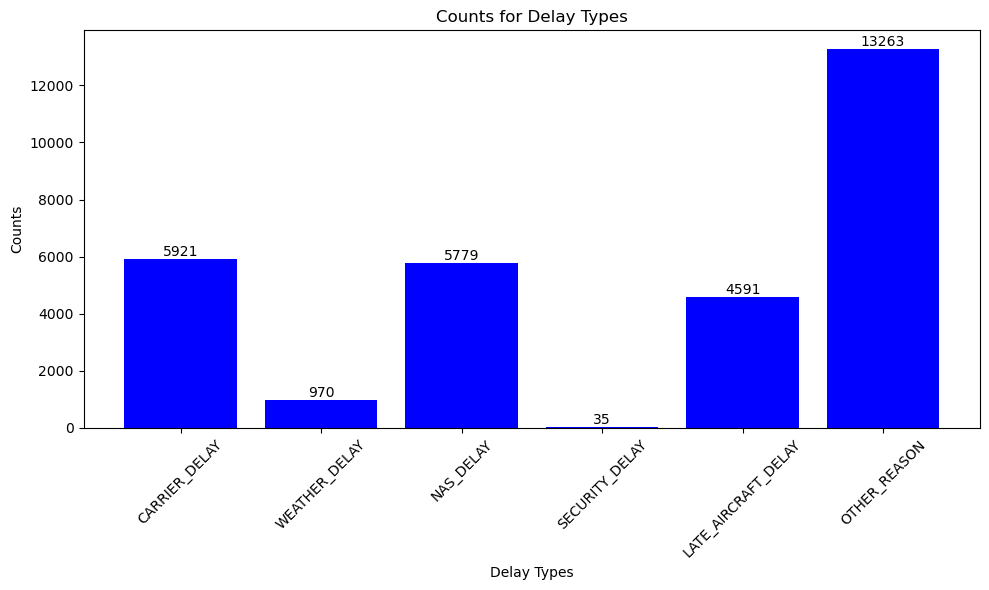

In [31]:
# Create a Bar Chart showing the different types of delays

# Convert delay column values to numeric
delayedflights['CARRIER_DELAY'] = pd.to_numeric(delayedflights['CARRIER_DELAY'], errors='coerce')
delayedflights['WEATHER_DELAY'] = pd.to_numeric(delayedflights['WEATHER_DELAY'], errors='coerce')
delayedflights['NAS_DELAY'] = pd.to_numeric(delayedflights['NAS_DELAY'], errors='coerce')
delayedflights['SECURITY_DELAY'] = pd.to_numeric(delayedflights['SECURITY_DELAY'], errors='coerce')
delayedflights['LATE_AIRCRAFT_DELAY'] = pd.to_numeric(delayedflights['LATE_AIRCRAFT_DELAY'], errors='coerce')

# Calculate the counts for each delay type
count_carrier_delay = len(delayedflights[delayedflights['CARRIER_DELAY'] > 0.0])
count_weather_delay = len(delayedflights[delayedflights['WEATHER_DELAY'] > 0.0])
count_nas_delay = len(delayedflights[delayedflights['NAS_DELAY'] > 0.0])
count_security_delay = len(delayedflights[delayedflights['SECURITY_DELAY'] > 0.0])
count_late_aircraft_delay = len(delayedflights[delayedflights['LATE_AIRCRAFT_DELAY'] > 0.0])

# Calculate the count for rows with all delay columns as 0.0
num_all_zero_rows = len(delayedflights[(delayedflights['CARRIER_DELAY'] == 0.0) & 
                        (delayedflights['WEATHER_DELAY'] == 0.0) & (delayedflights['NAS_DELAY'] == 0.0) & 
                        (delayedflights['SECURITY_DELAY'] == 0.0) & (delayedflights['LATE_AIRCRAFT_DELAY'] == 0.0)])

# Create the delay_counts dictionary including the "Other reason" category
delay_counts = {
    "CARRIER_DELAY": count_carrier_delay,
    "WEATHER_DELAY": count_weather_delay,
    "NAS_DELAY": count_nas_delay,
    "SECURITY_DELAY": count_security_delay,
    "LATE_AIRCRAFT_DELAY": count_late_aircraft_delay,
    "OTHER_REASON": num_all_zero_rows
}

# Create a list of delay types and their corresponding counts
delay_types = list(delay_counts.keys())
delay_counts_values = list(delay_counts.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(delay_types, delay_counts_values, color='blue')

# Add annotations for each bar with the corresponding counts
for bar, count in zip(bars, delay_counts_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom')

plt.xlabel('Delay Types')
plt.ylabel('Counts')
plt.title('Counts for Delay Types')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the bar chart
plt.show()


In [32]:
# Filter for flights departing from Atlanta, GA and find the maximum DEP_DELAY
max_dep_delay_atlanta = delayedflights[delayedflights["ORIGIN_CITY_NAME"] == "Atlanta, GA"]["DEP_DELAY"].max()

# Convert 'ARR_DELAY' column to numeric type before finding the maximum value
delayedflights["ARR_DELAY"] = pd.to_numeric(delayedflights["ARR_DELAY"], errors='coerce')

# Filter for flights arriving at Atlanta, GA and find the maximum ARR_DELAY
max_arr_delay_atlanta = delayedflights[delayedflights["DEST_CITY_NAME"] == "Atlanta, GA"]["ARR_DELAY"].max()

print("Maximum Arrival Delay for Atlanta, GA:", max_arr_delay_atlanta)

print("Maximum Departure Delay for Atlanta, GA:", max_dep_delay_atlanta)


# Convert 'ARR_DELAY' and 'DEP_DELAY' columns to numeric type
delayedflights["ARR_DELAY"] = pd.to_numeric(delayedflights["ARR_DELAY"], errors='coerce')
delayedflights["DEP_DELAY"] = pd.to_numeric(delayedflights["DEP_DELAY"], errors='coerce')

# Filter for flights where the origin city is Atlanta, GA and find the minimum DEP_DELAY
min_dep_delay_atlanta = delayedflights[(delayedflights["ORIGIN_CITY_NAME"] == "Atlanta, GA") & (delayedflights["DEP_DELAY"] >= 0)]["DEP_DELAY"].min()

# Filter for flights where the destination city is Atlanta, GA and find the minimum ARR_DELAY
min_arr_delay_atlanta = delayedflights[(delayedflights["DEST_CITY_NAME"] == "Atlanta, GA") & (delayedflights["ARR_DELAY"] >= 0)]["ARR_DELAY"].min()

print("Minimum Departure Delay for flights from Atlanta, GA (excluding negative values):", min_dep_delay_atlanta)
print("Minimum Arrival Delay for flights to Atlanta, GA (excluding negative values):", min_arr_delay_atlanta)

# Convert 'ARR_DELAY' and 'DEP_DELAY' columns to numeric type
delayedflights["ARR_DELAY"] = pd.to_numeric(delayedflights["ARR_DELAY"], errors='coerce')
delayedflights["DEP_DELAY"] = pd.to_numeric(delayedflights["DEP_DELAY"], errors='coerce')

# Filter for rows where either DEP_DELAY is non-negative for origin city Atlanta or ARR_DELAY is non-negative for destination city Atlanta
filtered_flights = delayedflights[((delayedflights["ORIGIN_CITY_NAME"] == "Atlanta, GA") & (delayedflights["DEP_DELAY"] >= 0)) |
                                  ((delayedflights["DEST_CITY_NAME"] == "Atlanta, GA") & (delayedflights["ARR_DELAY"] >= 0))]

# Display the filtered DataFrame
filtered_flights

Maximum Arrival Delay for Atlanta, GA: 1197.0
Maximum Departure Delay for Atlanta, GA: 992.00
Minimum Departure Delay for flights from Atlanta, GA (excluding negative values): 0.0
Minimum Arrival Delay for flights to Atlanta, GA (excluding negative values): 0.0


,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,DEST_CITY_NAME,DEST_STATE_ABR,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,DIV_AIRPORT_LANDINGS,DIV_ACTUAL_ELAPSED_TIME
65,"Charlotte, NC",NC,"Atlanta, GA",GA,62.0,14.00,7.00,46.0,5.0,0.0,0.0,0.0,41.0,0.00,0.0,0.00,0,0.0
149,"Atlanta, GA",GA,"Dallas/Fort Worth, TX",TX,79.0,15.00,4.00,53.0,53.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0,0.0
268,"Dallas/Fort Worth, TX",TX,"Atlanta, GA",GA,35.0,15.00,9.00,29.0,29.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0,0.0
520,"Miami, FL",FL,"Atlanta, GA",GA,100.0,16.00,6.00,93.0,6.0,0.0,0.0,0.0,87.0,0.00,0.0,0.00,0,0.0
1470,"Chicago, IL",IL,"Atlanta, GA",GA,12.0,16.00,5.00,7.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581815,"Las Vegas, NV",NV,"Atlanta, GA",GA,4.0,16.00,8.00,4.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0,0.0
581820,"Atlanta, GA",GA,"New York, NY",NY,5.0,12.00,10.00,10.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0,0.0
581834,"Houston, TX",TX,"Atlanta, GA",GA,37.0,13.00,4.00,26.0,25.0,0.0,0.0,0.0,1.0,0.00,0.0,0.00,0,0.0
582251,"Atlanta, GA",GA,"Miami, FL",FL,2.0,10.00,6.00,-19.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0,0.0


C:\Users\laure\AppData\Local\Temp\ipykernel_11560\1425156494.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"For departure delays, in {label} mins, there are {dep_delay_counts[i]} delays")
C:\Users\laure\AppData\Local\Temp\ipykernel_11560\1425156494.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"For arrival delays, in {label} mins, there are {arr_delay_counts[i]} delays")


For departure delays, in 0-15 mins, there are 4559 delays
For arrival delays, in 0-15 mins, there are 3920 delays
For departure delays, in 15-30 mins, there are 1972 delays
For arrival delays, in 15-30 mins, there are 1777 delays
For departure delays, in 30-60 mins, there are 1741 delays
For arrival delays, in 30-60 mins, there are 1602 delays
For departure delays, in 60-120 mins, there are 1054 delays
For arrival delays, in 60-120 mins, there are 1053 delays
For departure delays, in 120+ mins, there are 672 delays
For arrival delays, in 120+ mins, there are 955 delays


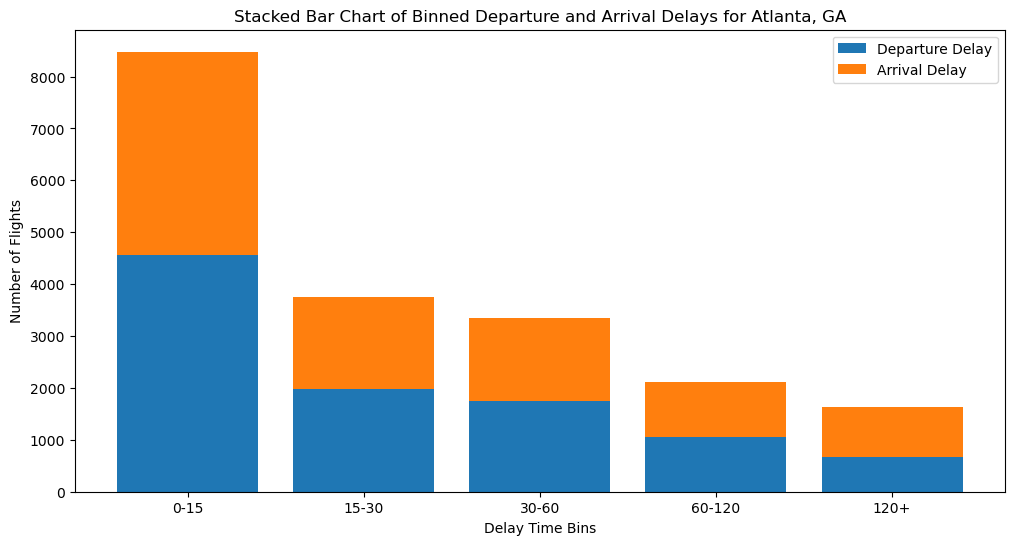

In [44]:
# Time of Delay (length); create a stacked bar chart based on departures from target city & arrivals to target city
# Binned to different intervals
# Define the bins for delay intervals
bins = [0, 15, 30, 60, 120, float('inf')]
labels = ['0-15', '15-30', '30-60', '60-120', '120+']

# Filter for flights departing from Atlanta, GA and bin the departure delays
dep_delay_atlanta = filtered_flights[filtered_flights["ORIGIN_CITY_NAME"] == "Atlanta, GA"].copy()
dep_delay_atlanta.loc[:, 'DEP_DELAY_BIN'] = pd.cut(dep_delay_atlanta['DEP_DELAY'], bins=bins, labels=labels, right=False)

# Filter for flights arriving at Atlanta, GA and bin the arrival delays
arr_delay_atlanta = filtered_flights[filtered_flights["DEST_CITY_NAME"] == "Atlanta, GA"].copy()
arr_delay_atlanta.loc[:, 'ARR_DELAY_BIN'] = pd.cut(arr_delay_atlanta['ARR_DELAY'], bins=bins, labels=labels, right=False)

# Group by the bins and count the number of flights for departure and arrival delays
dep_delay_counts = dep_delay_atlanta['DEP_DELAY_BIN'].value_counts().reindex(labels, fill_value=0)
arr_delay_counts = arr_delay_atlanta['ARR_DELAY_BIN'].value_counts().reindex(labels, fill_value=0)

# Create a stacked bar chart for binned departure and arrival delays
plt.figure(figsize=(12, 6))
plt.bar(labels, dep_delay_counts, label='Departure Delay')
plt.bar(labels, arr_delay_counts, bottom=dep_delay_counts, label='Arrival Delay')

plt.xlabel('Delay Time Bins')
plt.ylabel('Number of Flights')
plt.title('Stacked Bar Chart of Binned Departure and Arrival Delays for Atlanta, GA')
plt.legend()

# Print the counts as text below the chart
for i, label in enumerate(labels):
    print(f"For departure delays, in {label} mins, there are {dep_delay_counts[i]} delays")
    print(f"For arrival delays, in {label} mins, there are {arr_delay_counts[i]} delays")
plt.show()


In [39]:
# Collect the number of delays, cancelled, or diverted flights
# Filter for flights with departure delays for origin city Atlanta
dep_delay_atlanta = filtered_flights[(filtered_flights["ORIGIN_CITY_NAME"] == "Atlanta, GA") & (filtered_flights["DEP_DELAY"] > 0)]

# Filter for flights with arrival delays for destination city Atlanta
arr_delay_atlanta = filtered_flights[(filtered_flights["DEST_CITY_NAME"] == "Atlanta, GA") & (filtered_flights["ARR_DELAY"] > 0)]

# Convert "CANCELLED" and "DIVERTED" columns to numeric values using .loc
filtered_flights.loc[:, "CANCELLED"] = pd.to_numeric(filtered_flights["CANCELLED"], errors='coerce')
filtered_flights.loc[:, "DIVERTED"] = pd.to_numeric(filtered_flights["DIVERTED"], errors='coerce')

# Filter for flights that are cancelled (any number higher than 0.0)
cancelled_flights = filtered_flights[filtered_flights["CANCELLED"] > 0.0]

# Filter for flights that are diverted (any number higher than 0.0)
diverted_flights = filtered_flights[filtered_flights["DIVERTED"] > 0.0]

# Count the number of flights for each condition
num_dep_delay_atlanta = len(dep_delay_atlanta)
num_arr_delay_atlanta = len(arr_delay_atlanta)
num_cancelled = len(cancelled_flights)
num_diverted = len(diverted_flights)

print("Number of flights with departure delays for Atlanta:", num_dep_delay_atlanta)
print("Number of flights with arrival delays for Atlanta:", num_arr_delay_atlanta)
print("Number of cancelled flights:", num_cancelled)
print("Number of diverted flights:", num_diverted)

Number of flights with departure delays for Atlanta: 9603
Number of flights with arrival delays for Atlanta: 9074
Number of cancelled flights: 19
Number of diverted flights: 92


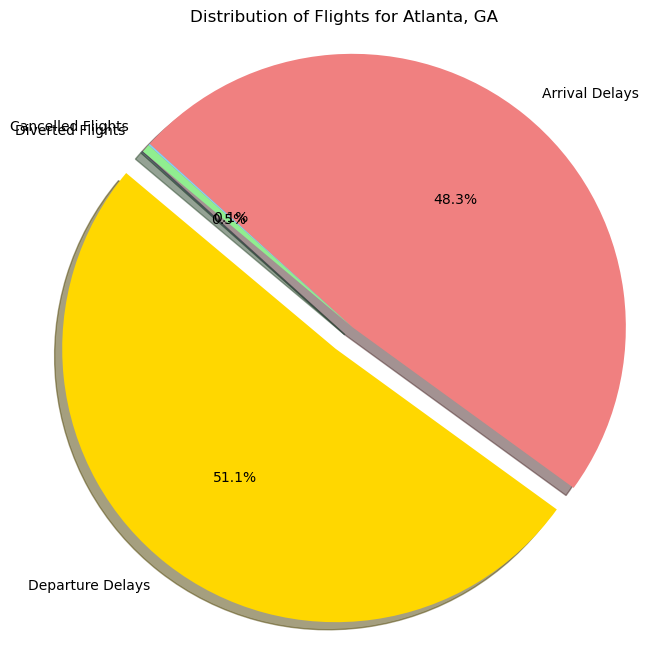

In [40]:
# Data for the pie chart
labels = ['Departure Delays', 'Arrival Delays', 'Cancelled Flights', 'Diverted Flights']
sizes = [num_dep_delay_atlanta, num_arr_delay_atlanta, num_cancelled, num_diverted]
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']
explode = (0.1, 0, 0, 0)  # Explode the first slice (Dep Delay Atlanta)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Flights for Atlanta, GA')
plt.show()

# Not using this pie chart since cancelled and diverted are not visible as separate categories

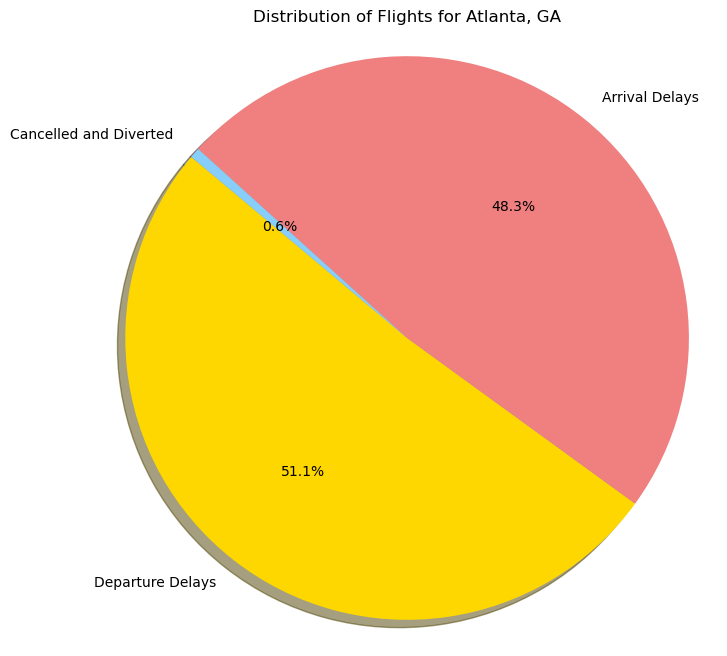

In [43]:
# Data for the pie chart
labels = ['Departure Delays', 'Arrival Delays', 'Cancelled and Diverted']
sizes = [num_dep_delay_atlanta, num_arr_delay_atlanta, num_cancelled + num_diverted]
colors = ['gold', 'lightcoral', 'lightskyblue']


# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Flights for Atlanta, GA')
plt.show()